# 9 Facial Expressions You Need

# ❇️ Importing Necessary Libraries

In [3]:
import os
import cv2
import numpy as np

- **os** → Handles file and folder operations (e.g., list, create, delete).  
- **cv2** → OpenCV library used for image processing (read, display, edit images).  
- **numpy** → Used for numerical operations and arrays (images are stored as NumPy arrays).

# Image Preprocessing

In [40]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Paths to dataset folders
dataset_folders = [
    "/Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset/test/images",
    "/Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset/train/images",
    "/Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset/valid/images"
]

# Collect all image file paths from all folders
image_files = []
for folder in dataset_folders:
    for f in os.listdir(folder):
        if f.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(folder, f))

print(f"Total images: {len(image_files)}")

Total images: 68284


- `os` → for interacting with the operating system, e.g., listing files and handling paths.  
- `PIL.Image` → for opening or manipulating images (not used yet in this snippet).  
- `matplotlib.pyplot` → for plotting images (not used yet here).  
- `numpy` → for numerical operations on image data (also not used yet here).  

- `image_files = []` → create an empty list to store image paths.  
- `for folder in dataset_folders:` → loop through each folder.  
- `for f in os.listdir(folder):` → list all files in the current folder.  
- `if f.endswith(('.png', '.jpg', '.jpeg')):` → check if the file is an image.  
- `image_files.append(os.path.join(folder, f))` → add the full path of the image to `image_files`.  

✅ After this, `image_files` contains all image paths from test, train, and validation folders.  
- `len(image_files)` → counts how many images were collected.  
- Prints the total number of images across all folders.

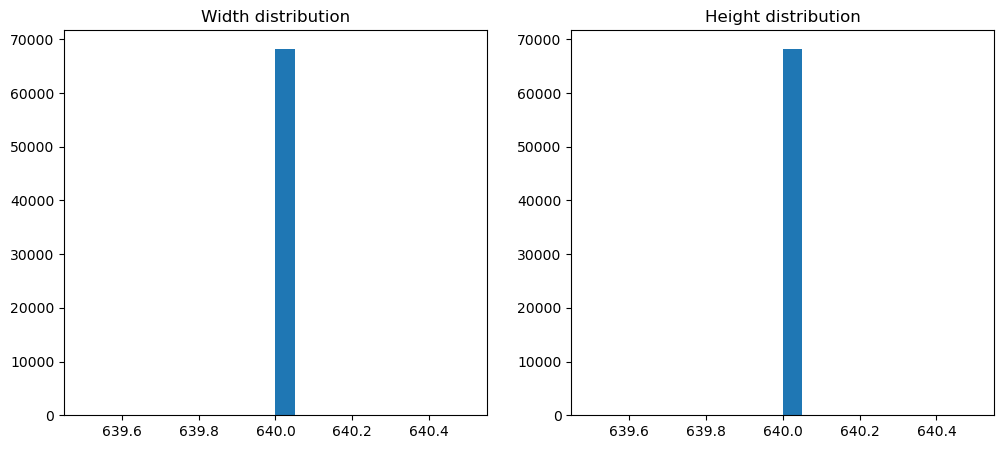

In [42]:
widths, heights = [], []

for img_path in image_files:
    img = Image.open(img_path)
    w, h = img.size
    widths.append(w)
    heights.append(h)

# Plot histogram
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(widths, bins=20)
plt.title("Width distribution")
plt.subplot(1,2,2)
plt.hist(heights, bins=20)
plt.title("Height distribution")
plt.show()

- `widths, heights = [], []` → create empty lists to store the width and height of each image.  

- `for img_path in image_files:` → loop through each image path in the dataset.  
  - `img = Image.open(img_path)` → open the image using PIL.  
  - `w, h = img.size` → get the width (`w`) and height (`h`) of the image.  
  - `widths.append(w)` → add the width to the `widths` list.  
  - `heights.append(h)` → add the height to the `heights` list.  

- Plot histogram:  
  - `plt.figure(figsize=(12,5))` → set the figure size.  
  - `plt.subplot(1,2,1)` → create the first subplot (left).  
    - `plt.hist(widths, bins=20)` → plot histogram of image widths.  
    - `plt.title("Width distribution")` → set title for width histogram.  
  - `plt.subplot(1,2,2)` → create the second subplot (right).  
    - `plt.hist(heights, bins=20)` → plot histogram of image heights.  
    - `plt.title("Height distribution")` → set title for height histogram.  
  - `plt.show()` → display both histograms.  

✅ This code **analyzes the dimensions of all images** in the dataset and visualizes the **distribution of widths and heights** using histograms.

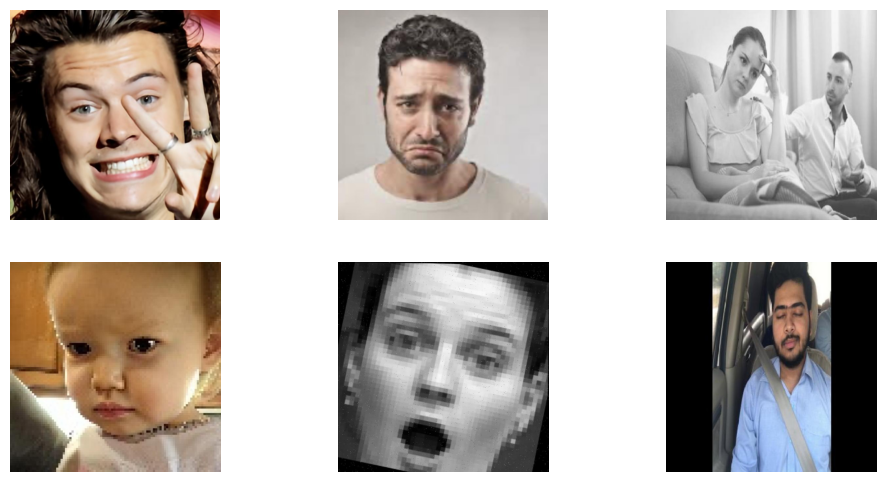

In [44]:
plt.figure(figsize=(12,6))
for i, img_path in enumerate(image_files[:6]):  # first 6 images
    img = Image.open(img_path)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

- `plt.figure(figsize=(12,6))` → create a figure with a width of 12 inches and height of 6 inches.  

- `for i, img_path in enumerate(image_files[:6]):` → loop through the **first 6 images** in the dataset.  
  - `img = Image.open(img_path)` → open the image using PIL.  
  - `plt.subplot(2,3,i+1)` → create a subplot grid with 2 rows and 3 columns, placing the current image in position `i+1`.  
  - `plt.imshow(img)` → display the image in the subplot.  
  - `plt.axis('off')` → hide the axes for a cleaner view.  

- `plt.show()` → display all 6 images in a 2×3 grid.  

✅ This code **visualizes the first 6 images** in your dataset for a quick inspection.

In [6]:
def preprocess_image(image_path, target_size=(640, 640), to_gray=False):
    img = cv2.imread(image_path)
    if img is None:
        return None
    if to_gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size) # resize


    # Normalize for training (not saving)
    img_normalized = img / 255.0  # Scale to 0-1 for uint8 images

    # Convert back to uint8 for saving
    img_save = (img_normalized * 255).astype("uint8")

    # Save properly
    cv2.imwrite(os.path.join(output_img_path, file), cv2.cvtColor(img_save, cv2.COLOR_RGB2BGR))

### 🧩 Function: `preprocess_image`

**Purpose:**  
Preprocesses an image before training — resizing, color conversion, and normalization.

**Steps:**
1. **Read image**
   - `cv2.imread(image_path)` loads the image.
   - Returns `None` if the file doesn't exist.

2. **Color conversion**
   - If `to_gray=True`: convert to grayscale → `cv2.COLOR_BGR2GRAY`
   - Else: convert from BGR → RGB (OpenCV loads in BGR by default).

3. **Resize**
   - `cv2.resize(img, target_size)` resizes the image (default 640×640).

4. **Normalize**
   - `img / 255.0` scales pixel values from `0–255` to `0–1` for training.

5. **Convert back to uint8**
   - `(img_normalized * 255).astype("uint8")` brings values back to 8-bit format for saving.

6. **Save processed image**
   - `cv2.imwrite()` saves the image after converting RGB → BGR again for OpenCV.

**Note:**  
- `output_img_path` and `file` should be defined before calling `cv2.imwrite()`.


In [9]:
# folder
folders = ["train", "test", "valid"]
base_path = "/Users/natashababu/Documents/internship/facial-expression/9-Facial-Expressions-You-Need"
save_path = "/Users/natashababu/Documents/internship/facial-expression/preprocessed-dataset"

for folder in folders:
    input_img_path = os.path.join(base_path, folder, "images")
    input_lbl_path = os.path.join(base_path, folder, "labels")

    output_img_path = os.path.join(save_path, folder, "images")
    output_lbl_path = os.path.join(save_path, folder, "labels")

    os.makedirs(output_img_path, exist_ok=True)
    os.makedirs(output_lbl_path, exist_ok=True)

    print(f"Processing {folder} images...")
    for file in os.listdir(input_img_path):
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        img_path = os.path.join(input_img_path, file)
        processed = preprocess_image(img_path)

        # Copy corresponding label file
        label_name = os.path.splitext(file)[0] + ".txt"
        src_label = os.path.join(input_lbl_path, label_name)
        dst_label = os.path.join(output_lbl_path, label_name)

        if os.path.exists(src_label):
            with open(src_label, "r") as f:
                label_data = f.read()
            with open(dst_label, "w") as f:
                f.write(label_data)

print("✅ All images preprocessed and labels copied successfully!")

Processing train images...
Processing test images...
Processing valid images...
✅ All images preprocessed and labels copied successfully!


### 🧩 Code Summary

**Purpose:**  
This code preprocesses all images and copies their corresponding label files for the `train`, `test`, and `valid` datasets, creating a ready-to-use dataset for training machine learning models.

**Steps:**
1. **Define paths**  
   - `base_path` points to the original dataset.  
   - `save_path` is where the preprocessed dataset will be stored.  
   - The code works with separate folders for `train`, `test`, and `valid`.

2. **Loop through folders**  
   - For each folder, input and output paths for images and labels are set.  
   - Output directories are created if they don’t exist.

3. **Process images**  
   - Iterate through all files in the input image folder.  
   - Skip files that are not images (`.jpg`, `.jpeg`, `.png`).  
   - Each image is preprocessed using the `preprocess_image()` function (resizing, color conversion, and normalization).

4. **Copy labels**  
   - For each image, find the corresponding `.txt` label file.  
   - Read the label content and write it to the output label folder, preserving the original file structure.

5. **Completion message**  
   - After all images and labels are processed, a success message is printed.

**Result:**  
A clean, preprocessed dataset with images resized and normalized, and all labels copied correctly, ready for training models while keeping the original folder structure intact.


In [12]:
# For PyTorch >=2.0 (with MPS support)
!pip install torch torchvision torchaudio

### 🧩 Code Explanation

**Purpose:**  
Installs PyTorch and related libraries for deep learning, specifically compatible with **PyTorch ≥2.0** and **MPS (Metal Performance Shaders) support** on macOS.

**Libraries:**

- torch → Core PyTorch library for tensor operations and building neural networks.
- torchvision → Utilities for computer vision tasks (image transformations, pretrained models, datasets).
- torchaudio → Utilities for audio processing with PyTorch (datasets, transforms, models).

In [14]:
import torch
torch.backends.mps.is_available()  # Should return True
torch.backends.mps.is_built()      # Should return True

True

### 🧩 Code Explanation

**Purpose:**  
Checks if **MPS (Metal Performance Shaders)** is available and built on your Mac for PyTorch GPU acceleration.

**Code:**
```python
import torch

# Check if MPS (Apple GPU support) is available
torch.backends.mps.is_available()  # Returns True if MPS can be used

# Check if MPS is built in your PyTorch installation
torch.backends.mps.is_built()      # Returns True if PyTorch was compiled with MPS support

In [11]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
!nvidia-smi

PyTorch version: 2.8.0
CUDA available: False
CUDA device count: 0
zsh:1: command not found: nvidia-smi


- `import torch` → imports PyTorch library.  
- `torch.__version__` → shows PyTorch version.  
- `torch.cuda.is_available()` → checks if GPU (CUDA) is available.  
- `torch.cuda.device_count()` → shows number of available GPUs.  
- `!nvidia-smi` → displays GPU info and memory usage.  

In [21]:
!pip install ultralytics

- `!pip install ultralytics` → installs the **Ultralytics YOLO library** in your environment.
  - `!` is used to run **shell commands** from a notebook.
  - `pip install` downloads and installs the package from **PyPI**.
  - `ultralytics` library provides YOLOv8 models for **object detection, segmentation, and classification**.

In [ ]:
!ls /kaggle/input/preprocessed-dataset
!ls /kaggle/input/preprocessed-dataset/preprocessed-dataset

- `!ls /kaggle/input/preprocessed-dataset`  
  - Lists all files and folders inside the directory `/kaggle/input/preprocessed-dataset`.  
  - `ls` is a shell command that shows directory contents.

- `!ls /kaggle/input/preprocessed-dataset/preprocessed-dataset`  
  - Lists all files and folders inside the subdirectory `/kaggle/input/preprocessed-dataset/preprocessed-dataset`.  
  - Useful for exploring the dataset structure before loading it.

In [ ]:
import shutil
import os

# Original yaml path (read-only)
original_yaml = "/kaggle/input/preprocessed-dataset/data.yaml"

# Copy to working directory (editable)
shutil.copy(original_yaml, "/kaggle/working/data.yaml")

src_inner = "/kaggle/input/preprocessed-dataset/preprocessed-dataset/preprocessed-dataset"
dst = "/kaggle/working/preprocessed-dataset"

shutil.copytree(src_inner, dst, dirs_exist_ok=True)
print("✅ Inner dataset copied to working folder!")

- `import shutil` → imports the `shutil` module for file operations.  
- `import os` → imports the `os` module for interacting with the filesystem.  
- `shutil.copy(original_yaml, "/kaggle/working/data.yaml")` → copies the read-only `data.yaml` file to the working directory so it can be edited.  
- `shutil.copytree(src_inner, dst, dirs_exist_ok=True)` → copies the entire inner dataset folder to the working directory.  
  - `dirs_exist_ok=True` allows copying even if the destination folder already exists.  
- `print("✅ ...")` → confirms that the dataset has been successfully copied.  

In [ ]:
import yaml
import os

yaml_path = "/kaggle/working/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Update paths to the working folder
data['train'] = "/kaggle/working/preprocessed-dataset/train/images"
data['valid']   = "/kaggle/working/preprocessed-dataset/valid/images"
data['test']   = "/kaggle/working/preprocessed-dataset/test/images"

# Save the updated yaml
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("✅ data.yaml paths updated to working folder!")

- `import yaml` → imports the PyYAML library to read and write YAML files.  
- `yaml.safe_load(f)` → loads YAML content safely into a Python dictionary.  
- `data['train'] / data['valid'] / data['test']` → updates the dataset paths to point to the working directory, where the dataset was copied.  
- `yaml.dump(data, f)` → writes the updated dictionary back to the YAML file.  
- `print("✅ ...")` → confirms that the paths in `data.yaml` have been successfully updated.  

In [ ]:
!ls /kaggle/working/preprocessed-dataset
!ls /kaggle/working/preprocessed-dataset/preprocessed-dataset

- `!ls /kaggle/working/preprocessed-dataset`  
  - Lists all files and folders inside the directory `/kaggle/working/preprocessed-dataset`.  
  - Useful to check the dataset structure after copying.

- `!ls /kaggle/working/preprocessed-dataset/preprocessed-dataset`  
  - Lists all files and folders inside the subdirectory `/kaggle/working/preprocessed-dataset/preprocessed-dataset`.  
  - Helps verify that the inner dataset has been copied correctly and to explore its contents.

In [ ]:
!pip install "numpy<2" "matplotlib==3.10.6" --quiet

- Installs **specific versions** of Python packages in the notebook environment.  
- `"numpy<2"` → installs the latest NumPy version **less than 2**.  
- `"matplotlib==3.10.6"` → installs **Matplotlib version 3.10.6** exactly.  
- `--quiet` → suppresses installation messages for a cleaner output.

# Training model in kaggle using GPU

In [4]:
from ultralytics import YOLO

## 1️⃣ Load pretrained YOLOv8 nano model
# 's' = small → fastest and lightest for small datasets
model = YOLO("yolov8s.pt")

# 2️⃣ Training parameters optimized
model.train(
    data="/kaggle/working/data.yaml",     # Path to your dataset YAML
    epochs=10,           # Max epochs; early stopping will stop sooner
    imgsz=416,            # Image size (resize all images)
    device=0,            # Use colab GPU
    patience=5,          # Early stopping if val mAP doesn't improve for 10 epochs
    batch=32,             # Adjust batch size if you get memory errors
    augment=True,         # Enable YOLO's built-in augmentation
    hsv_h=0.015,          # Hue augmentation
    hsv_s=0.7,            # Saturation
    hsv_v=0.4,            # Brightness/value
    degrees=10,           # Random rotation
    translate=0.1,        # Random translation
    scale=0.5,            # Random scaling
    shear=2.0,            # Random shear
    fliplr=0.5,           # Horizontal flip
    flipud=0.0,           # Vertical flip
    mosaic=1.0,           # Mosaic augmentation
    mixup=0.1,             # Mixup augmentation
    cache=True,
    half=True
)

Ultralytics 8.3.207 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pretr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791a255ba450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

### 🧩 YOLOv8 Training Code Explanation

**Purpose:**  
Load a pretrained YOLOv8 small model and train it on a custom dataset with data augmentation and optimized parameters.

---

#### 1. Import YOLO: Loads the YOLO class from the Ultralytics library.
#### 2. Load pretrained model
- "yolov8s.pt" → small model (smallest and fastest, ideal for small datasets).
- Pretrained weights help the model converge faster.
#### 3. Train the model
| Parameter           | Description                                              |
| ------------------- | -------------------------------------------------------- |
| `data`              | Path to dataset YAML (images, labels, class names)       |
| `epochs`            | Maximum training cycles                                  |
| `imgsz`             | Resize all images to this size                           |
| `device`            | `"0"` → Use GPU T4 X 2 for faster training               |
| `patience`          | Early stopping if validation performance doesn’t improve |
| `batch`             | Number of images per batch                               |
| `augment`           | Enable YOLO’s built-in data augmentation                 |
| `hsv_h/s/v`         | Adjust hue, saturation, brightness randomly              |
| `degrees`           | Random rotation                                          |
| `translate`         | Random image shift                                       |
| `scale`             | Random scaling                                           |
| `shear`             | Random shear transformation                              |
| `fliplr` / `flipud` | Horizontal/vertical flips                                |
| `mosaic`            | Combine 4 images into 1 for better generalization        |
| `mixup`             | Blend two images and labels to reduce overfitting        |
| `cache`             | Speeds up training by caching images in RAM or disk      |
| `half`              | Uses half-precision (FP16) training instead of full-precision (FP32)|


In [7]:
model.save("/kaggle/working/trained_model.pt")

- Saves the trained YOLOv8 model to the specified path.  
- The file `trained_model.pt` contains the **model weights and configuration**.  
- This allows you to **reload the model later** for inference or further training.

In [8]:
from IPython.display import FileLink

# Create a link to download
FileLink("/kaggle/working/trained_model.pt")

/kaggle/working/trained_model.pt

- `from IPython.display import FileLink` → imports a function to create clickable download links in Jupyter/Kaggle notebooks.  
- `FileLink("/kaggle/working/trained_model.pt")` → generates a download link for the trained YOLO model saved in the working directory.  
- Clicking the link allows you to download the `.pt` model file to your local machine.  

In [ ]:
import zipfile

# Path to your model
model_path = "/kaggle/working/trained_model.pt"
zip_path = "/kaggle/working/yolov8_model.zip"

# Create a zip file
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(model_path, arcname="trained_model.pt")  # arcname avoids storing full path

print("Model zipped successfully!")

- `import zipfile` → imports Python’s built-in module to create and extract ZIP files.  
- `model_path` → path to the trained YOLO model `.pt` file.  
- `zip_path` → path where the ZIP file will be saved.  
- `zipfile.ZipFile(zip_path, 'w')` → opens/creates a ZIP file in write mode.  
- `zipf.write(model_path, arcname="trained_model.pt")` → adds the model file to the ZIP.  
  - `arcname` ensures only the filename is stored inside the ZIP, not the full folder path.  
- `print("Model zipped successfully!")` → confirms that the model has been zipped.  